<a href="https://colab.research.google.com/github/mmishra1092/Online-Retail-Customer-Segmentation-/blob/main/MAYANK_MISHRA_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Business Objective:**

Customer segmentation is the practice of dividing a company’s customers into groups that reflect similarity among customers in each group. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.

Customer segmentation has the potential to allow marketers to address each customer in the most effective way. Using the large amount of data available on customers (and potential customers), a customer segmentation analysis allows marketers to identify discrete groups of customers with a high degree of accuracy based on demographic, behavioral and other indicators.

# **Loading Dataset and Importing Modules**

In [408]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

from datetime import datetime
import datetime as dt
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from prettytable import PrettyTable

In [262]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [263]:
# Upload the data path
working_path = '/content/drive/MyDrive/Module: 4/Week_5/Capstone Project: Unsupervised ML: Clustering/Online Retail.xlsx'

In [264]:
# Read Dataset
customer_df = pd.read_excel(working_path)

# **Dataset Information and Summary**

In [265]:
# View first 5 rows of the dataset
customer_df.head()

InvoiceNo StockCode  ... CustomerID         Country
0    536365    85123A  ...    17850.0  United Kingdom
1    536365     71053  ...    17850.0  United Kingdom
2    536365    84406B  ...    17850.0  United Kingdom
3    536365    84029G  ...    17850.0  United Kingdom
4    536365    84029E  ...    17850.0  United Kingdom

[5 rows x 8 columns]

In [266]:
# View last 5 rows of the dataset
customer_df.tail()

InvoiceNo StockCode  ... CustomerID  Country
541904    581587     22613  ...    12680.0   France
541905    581587     22899  ...    12680.0   France
541906    581587     23254  ...    12680.0   France
541907    581587     23255  ...    12680.0   France
541908    581587     22138  ...    12680.0   France

[5 rows x 8 columns]

In [267]:
# Lets check the shape of the dataset
customer_df.shape

(541909, 8)

In [268]:
# Get all the features of dataset
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# **Feature Discription**

*   InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
*   StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
*   Description: Product (item) name. Nominal.
*   Quantity: The quantities of each product (item) per transaction. Numeric.
*   InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
*  UnitPrice: Unit price. Numeric, Product price per unit in sterling.
*   CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
*   Country: Country name. Nominal, the name of the country where each customer resides.

In [269]:
# Check all the information summary of dataset
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [270]:
# Check the uunique values
customer_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [271]:
# View the description of the dataset
customer_df.describe().T

count          mean          std  ...       50%       75%      max
Quantity    541909.0      9.552250   218.081158  ...      3.00     10.00  80995.0
UnitPrice   541909.0      4.611114    96.759853  ...      2.08      4.13  38970.0
CustomerID  406829.0  15287.690570  1713.600303  ...  15152.00  16791.00  18287.0

[3 rows x 8 columns]

# Data Preprocessing

In [272]:
# Check the missing values
customer_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

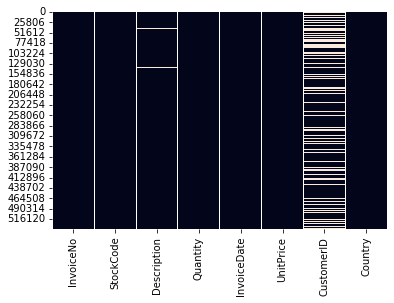

In [273]:
# Plotting the null values on heatmap
sns.heatmap(customer_df.isnull(), cbar = False)

Insight: It is evident from above plot that there are some null values in features Description and CustomerID.

In [274]:
# Lets Drop the null value
customer_df.dropna(inplace = True)

In [275]:
# Lets check the information summary after dropping null values
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [276]:
# View the shape of dataset after dropping null values
customer_df.shape

(406829, 8)

Conclusion: After removing all the null values the observation in our dataset redces to (406829, 8)

In [277]:
# Check duplicate values in our dataset
len(customer_df[customer_df.duplicated()])

5225

Conclusion: We can see that there are 5225 duplicate values in our dataset.


In [278]:
# Lets view the duplicate values in our dataset
customer_df[customer_df.duplicated()]

InvoiceNo StockCode  ... CustomerID         Country
517       536409     21866  ...    17908.0  United Kingdom
527       536409     22866  ...    17908.0  United Kingdom
537       536409     22900  ...    17908.0  United Kingdom
539       536409     22111  ...    17908.0  United Kingdom
555       536412     22327  ...    17920.0  United Kingdom
...          ...       ...  ...        ...             ...
541675    581538     22068  ...    14446.0  United Kingdom
541689    581538     23318  ...    14446.0  United Kingdom
541692    581538     22992  ...    14446.0  United Kingdom
541699    581538     22694  ...    14446.0  United Kingdom
541701    581538     23343  ...    14446.0  United Kingdom

[5225 rows x 8 columns]

Insight: We can see the duplicate vaues in above description. 

In [279]:
# Now drop the duplicate values from the datase
customer_df.drop_duplicates()

InvoiceNo StockCode  ... CustomerID         Country
0         536365    85123A  ...    17850.0  United Kingdom
1         536365     71053  ...    17850.0  United Kingdom
2         536365    84406B  ...    17850.0  United Kingdom
3         536365    84029G  ...    17850.0  United Kingdom
4         536365    84029E  ...    17850.0  United Kingdom
...          ...       ...  ...        ...             ...
541904    581587     22613  ...    12680.0          France
541905    581587     22899  ...    12680.0          France
541906    581587     23254  ...    12680.0          France
541907    581587     23255  ...    12680.0          France
541908    581587     22138  ...    12680.0          France

[401604 rows x 8 columns]

Insight: After dropping the duplicate values the shape of the dataset changes to(401604, 8)



*   We also need to drop some InvoiceNo which starts with 'c' as it indicates cancellation.



In [280]:
# Lets check the InviceNo that starts with c
customer_df['InvoiceNo'] = customer_df['InvoiceNo'].astype('str')
customer_df[customer_df['InvoiceNo'].str.contains('C')]

InvoiceNo StockCode  ... CustomerID         Country
141      C536379         D  ...    14527.0  United Kingdom
154      C536383    35004C  ...    15311.0  United Kingdom
235      C536391     22556  ...    17548.0  United Kingdom
236      C536391     21984  ...    17548.0  United Kingdom
237      C536391     21983  ...    17548.0  United Kingdom
...          ...       ...  ...        ...             ...
540449   C581490     23144  ...    14397.0  United Kingdom
541541   C581499         M  ...    15498.0  United Kingdom
541715   C581568     21258  ...    15311.0  United Kingdom
541716   C581569     84978  ...    17315.0  United Kingdom
541717   C581569     20979  ...    17315.0  United Kingdom

[8905 rows x 8 columns]

In [281]:
customer_df = customer_df[~customer_df['InvoiceNo'].str.contains('C')]
customer_df.shape

(397924, 8)

In [282]:
# Convert InvoiceDate column into 'year','month','day','hour','minute' and second
customer_df['InvoiceDate_year'] = customer_df['InvoiceDate'].dt.year
customer_df['InvoiceDate_month'] = customer_df['InvoiceDate'].dt.month
customer_df['InvoiceDate_day'] = customer_df['InvoiceDate'].dt.day
customer_df['InvoiceDate_hour'] = customer_df['InvoiceDate'].dt.hour
customer_df['InvoiceDate_minute'] = customer_df['InvoiceDate'].dt.minute
customer_df['InvoiceDate_second'] = customer_df['InvoiceDate'].dt.second
print('columns and data types')
pd.DataFrame(customer_df.dtypes).rename(columns = {0:'dtype'})

columns and data types


dtype
InvoiceNo                   object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
UnitPrice                  float64
CustomerID                 float64
Country                     object
InvoiceDate_year             int64
InvoiceDate_month            int64
InvoiceDate_day              int64
InvoiceDate_hour             int64
InvoiceDate_minute           int64
InvoiceDate_second           int64

In [283]:
()# Lets again check shape of the dataset
customer_df.shape

(397924, 14)

In [284]:
# View the added columns in data
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

# Exploratory Data Analysis(EDA)

First lets analyze the customers. We will check if each row has a single customer or not. If not than how many customers id we have.

In [285]:
# Lets check the unique id of the customer
customer_df['CustomerID'].nunique()

4339

Conclusion: In 397924 rows we have 4339 customers only.

In [286]:
# Most active customers
active_customers = pd.DataFrame(customer_df['CustomerID'].value_counts().sort_values(ascending = False).reset_index())
active_customers.rename(columns = {'index':'CustomerID', 'CustomerID':'Count'},inplace = True)
active_customers

CustomerID  Count
0        17841.0   7847
1        14911.0   5677
2        14096.0   5111
3        12748.0   4596
4        14606.0   2700
...          ...    ...
4334     16990.0      1
4335     16148.0      1
4336     13391.0      1
4337     13366.0      1
4338     12346.0      1

[4339 rows x 2 columns]

Text(0, 0.5, 'Count')

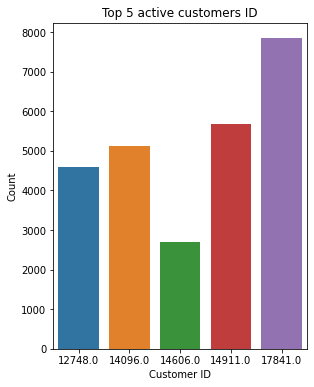

In [287]:
# Now lets plot the top 5 customers
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(active_customers['CustomerID'][:5],active_customers['Count'][:5])
plt.title('Top 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

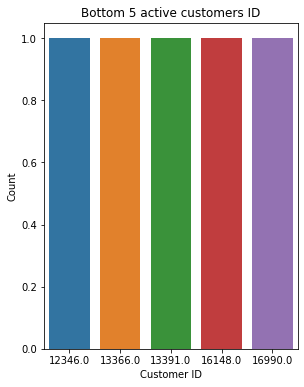

In [288]:
# Bottom 5 customer id
plt.figure(figsize=(10,6))
plt.subplot(1,2,2)
sns.barplot(active_customers['CustomerID'][-5:],active_customers['Count'][-5:])
plt.title('Bottom 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')

# Analysis of categorical features

In [289]:
# Analyze categorical features
categorical_columns = list(customer_df.select_dtypes(['object']).columns)
categorical_features = pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

In [290]:
# View the Invoiceno counts
customer_df['InvoiceNo'].value_counts()

576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
536641      1
545185      1
573995      1
553898      1
540819      1
Name: InvoiceNo, Length: 18536, dtype: int64

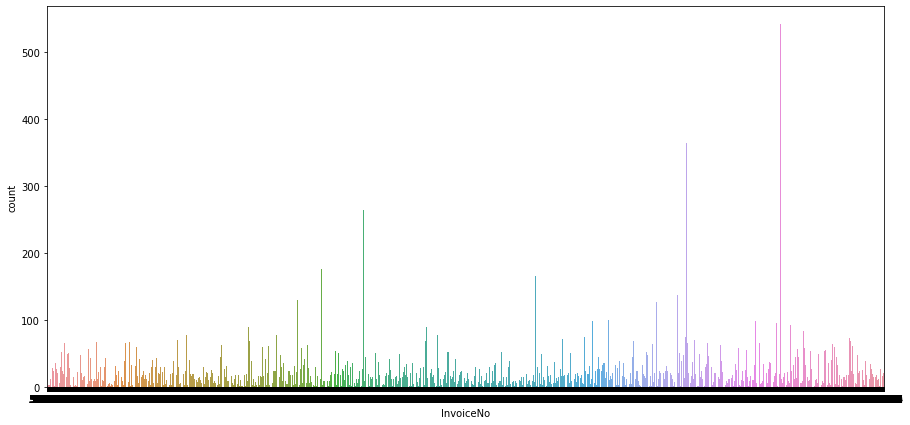

In [337]:
# Plot the invoice count
plt.figure(figsize=(15,7))
sns.countplot(x = 'InvoiceNo', data = customer_df)

# **StockCode**

In [292]:
# Create a variable and count the stockcode
stockcode_df = customer_df['StockCode'].value_counts().reset_index()
stockcode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
stockcode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
stockcode_df.head()

StockCode_Name  Count
0         85123A   2035
1          22423   1724
2         85099B   1618
3          84879   1408
4          47566   1397

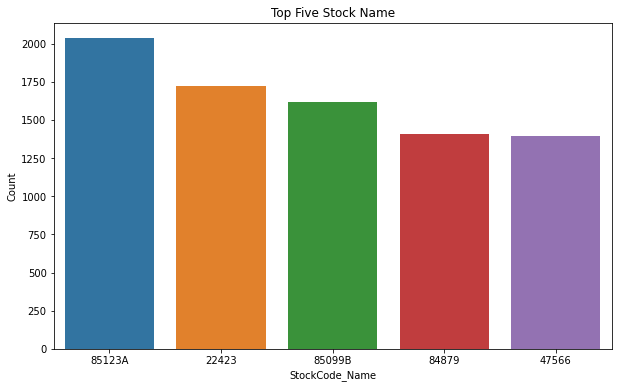

In [293]:
# Plot top 5 stock name
plt.figure(figsize=(10,6))
plt.title('Top Five Stock Name')
sns.barplot(x = 'StockCode_Name', y= 'Count', data = stockcode_df[:5])

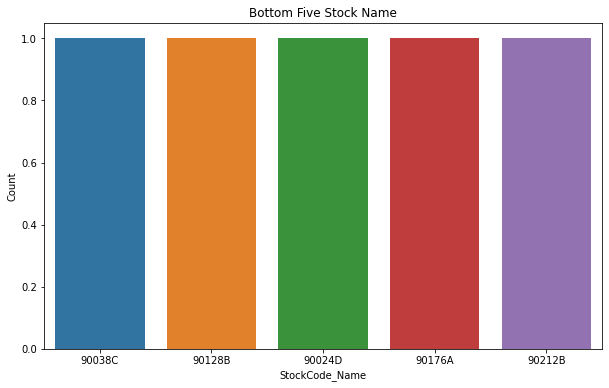

In [294]:
# Plot bottom 5 stock name
plt.figure(figsize=(10,6))
plt.title('Bottom Five Stock Name')
sns.barplot(x = 'StockCode_Name', y= 'Count', data = stockcode_df[-5:])

# **Description**

In [295]:
# Create a variable and check the description variable
Description_df = customer_df['Description'].value_counts().reset_index()
Description_df.rename(columns = {'index':'Description_Name'},inplace = True)
Description_df.rename(columns = {'Description':'Count'}, inplace = True)
Description_df.head()

Description_Name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2028
1            REGENCY CAKESTAND 3 TIER   1724
2             JUMBO BAG RED RETROSPOT   1618
3       ASSORTED COLOUR BIRD ORNAMENT   1408
4                       PARTY BUNTING   1397

In [296]:
# Bottom 5 product
Description_df.tail()

Description_Name  Count
3872  PURPLE ANEMONE ARTIFICIAL FLOWER      1
3873                 ENAMEL MUG PANTRY      1
3874   JARDIN ETCHED GLASS BUTTER DISH      1
3875   SET 12 COLOURING PENCILS DOILEY      1
3876            PINK POLKADOT KIDS BAG      1

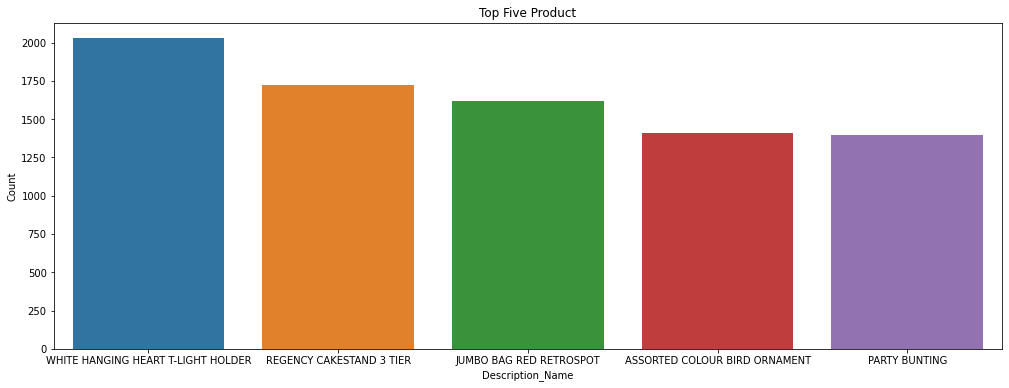

In [297]:
# Plot the top 5 product
plt.figure(figsize=(17,6))
plt.title('Top Five Product')
sns.barplot(x='Description_Name', y='Count', data = Description_df.head(5))

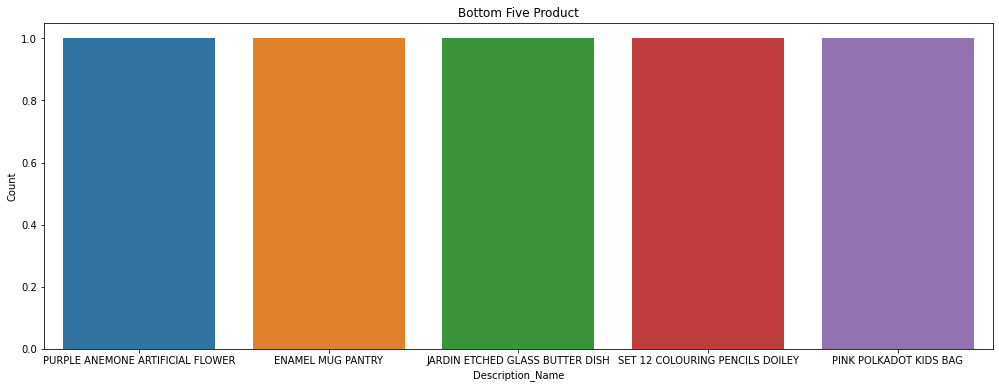

In [298]:
# Plot the bottom 5 product
plt.figure(figsize=(17,6))
plt.title('Bottom Five Product')
sns.barplot(x='Description_Name', y='Count', data = Description_df.tail(5))

# **Country**

In [299]:
# Create a variable and check the country variable and check top 5 countries
country_df = customer_df['Country'].value_counts().reset_index()
country_df.rename(columns = {'index':'Country_Name'}, inplace = True)
country_df.rename(columns = {'Country':'Count'}, inplace = True)
country_df.head()

Country_Name   Count
0  United Kingdom  354345
1         Germany    9042
2          France    8342
3            EIRE    7238
4           Spain    2485

In [300]:
# Bottom 5 countries
country_df.tail()

Country_Name  Count
32       Lithuania     35
33          Brazil     32
34  Czech Republic     25
35         Bahrain     17
36    Saudi Arabia      9

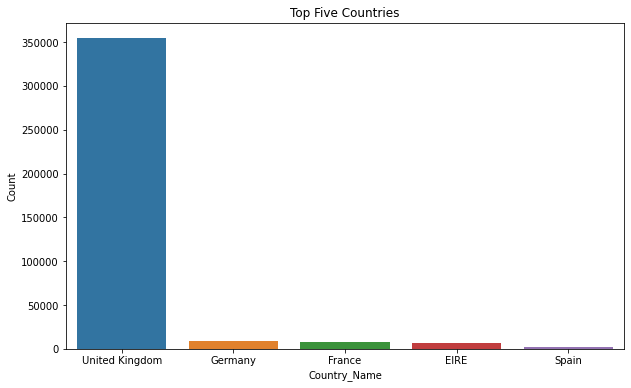

In [301]:
# Plot the top 5 countries
plt.figure(figsize=(10,6))
plt.title('Top Five Countries')
sns.barplot(x='Country_Name', y='Count', data = country_df.head(5))

Insight: From above plot we can see that majority of customers are from United Kingdom.

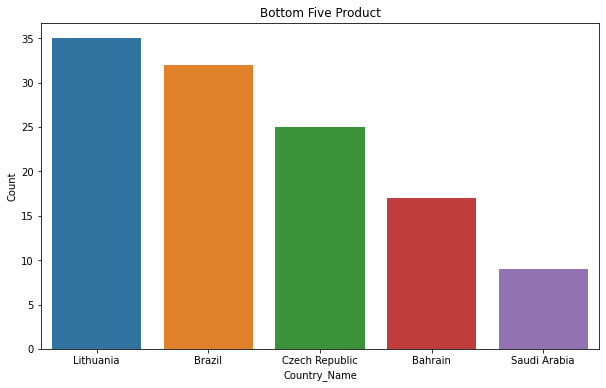

In [302]:
# Plot bottom 5 countries
plt.figure(figsize=(10,6))
plt.title('Bottom Five Product')
sns.barplot(x='Country_Name', y='Count', data = country_df.tail(5))

Insight: The least number of customers are from Saudi Arabia.

# **Analyzing all Numerical Features**

In [303]:
# Assigning numerical columns to variables
numerical_columns = list(customer_df.select_dtypes(['int64','float64']).columns)
numerical_features = pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

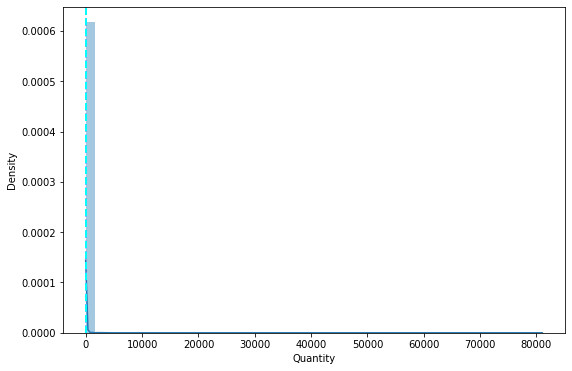

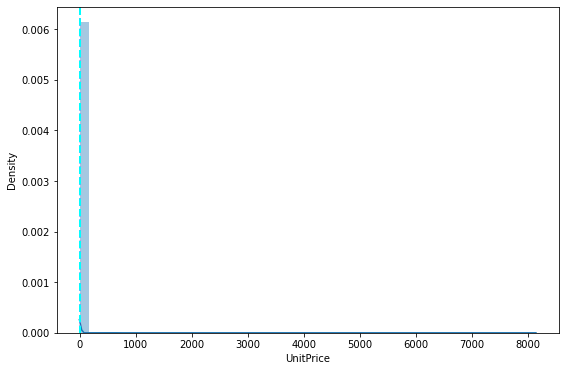

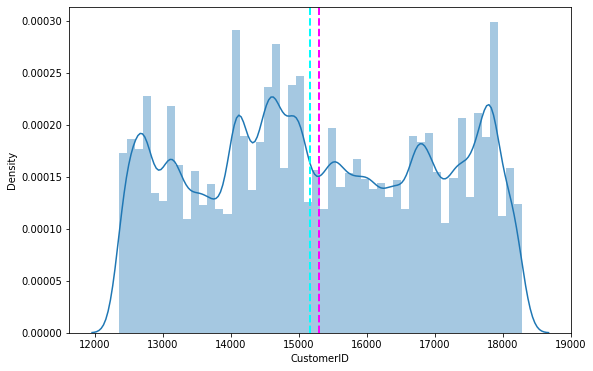

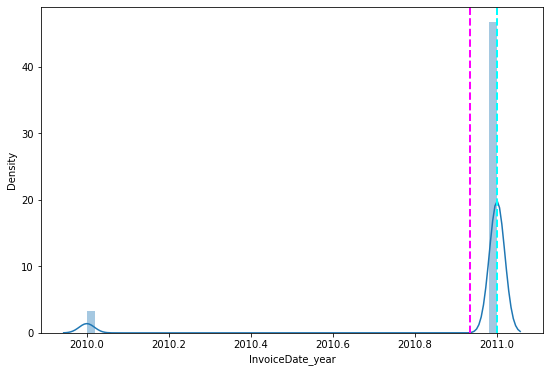

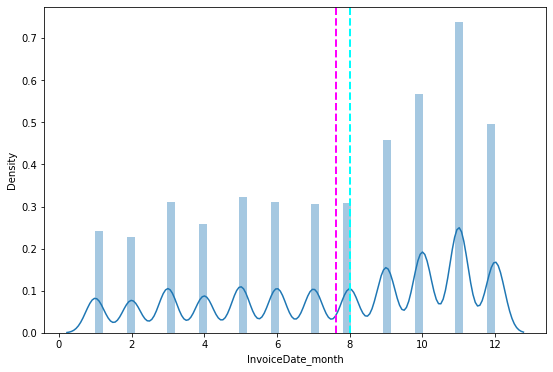

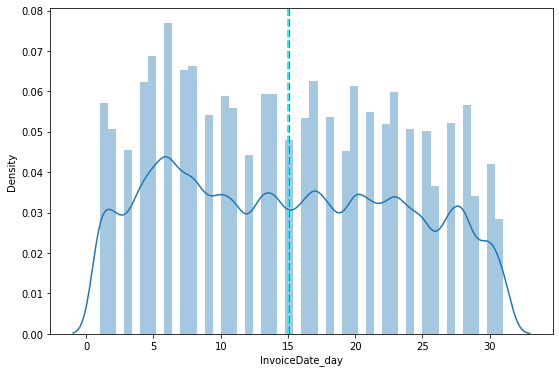

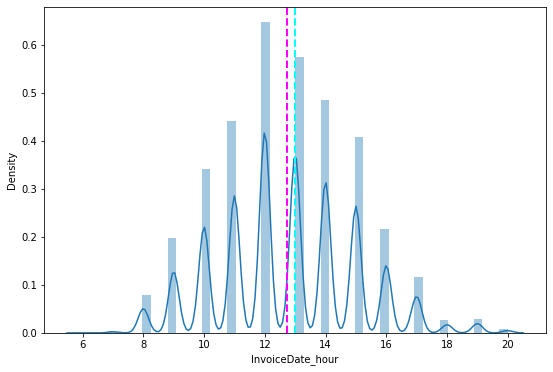

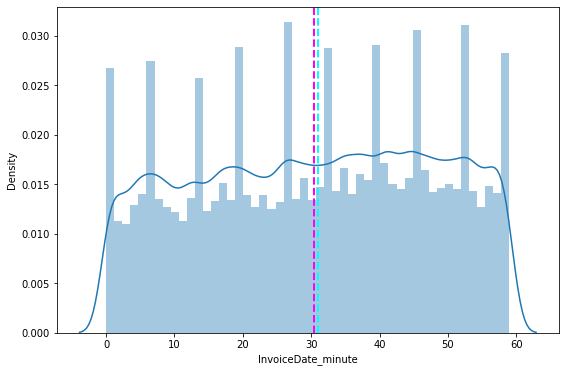

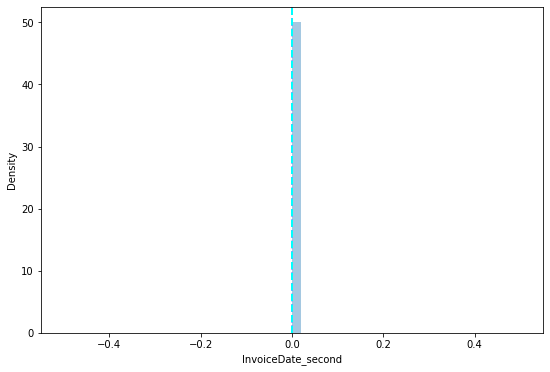

In [304]:
# Analysing distribution of all numerical variables
for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = customer_df[col]
    sns.distplot(x=customer_df[col])
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.xlabel(col)
plt.show()

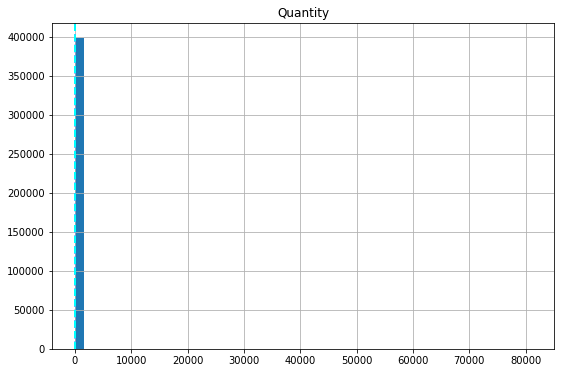

Skewness : 403.31943081039486
Kurtosis : 173965.71516660746


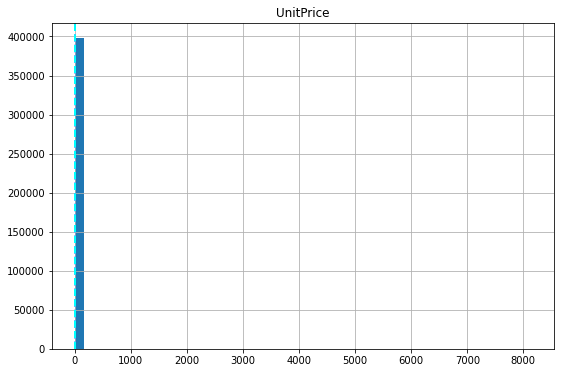

Skewness : 204.04241268899307
Kurtosis : 58146.02091050399


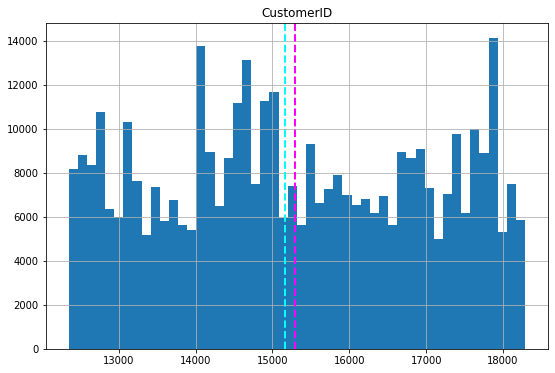

Skewness : 0.02577629847429845
Kurtosis : -1.1808302151571712


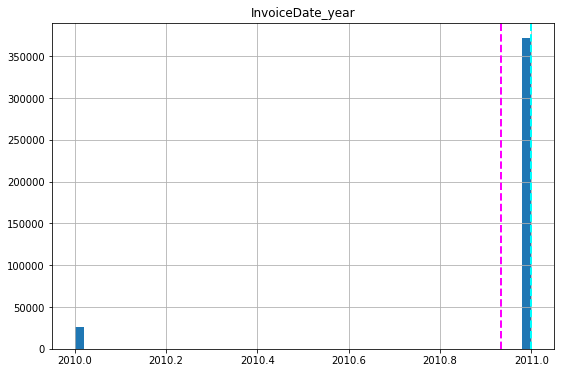

Skewness : -3.5045145019499735
Kurtosis : 10.281673570919017


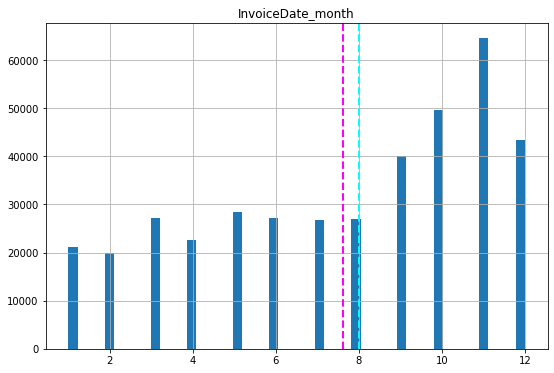

Skewness : -0.4448423572483675
Kurtosis : -1.074460364777609


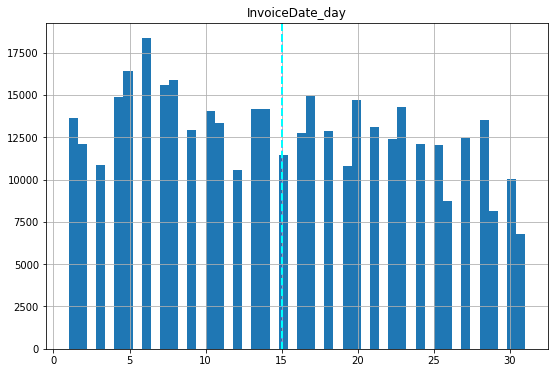

Skewness : 0.1144792789730314
Kurtosis : -1.1728727400772625


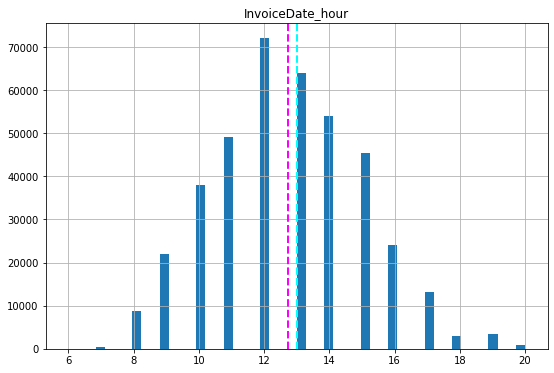

Skewness : 0.18903743045332783
Kurtosis : -0.20968488890482462


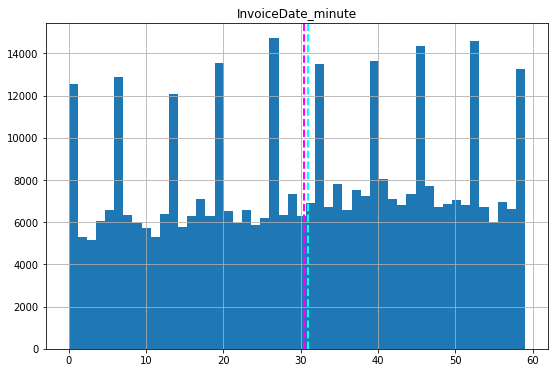

Skewness : -0.08092206133583811
Kurtosis : -1.1655389341755757


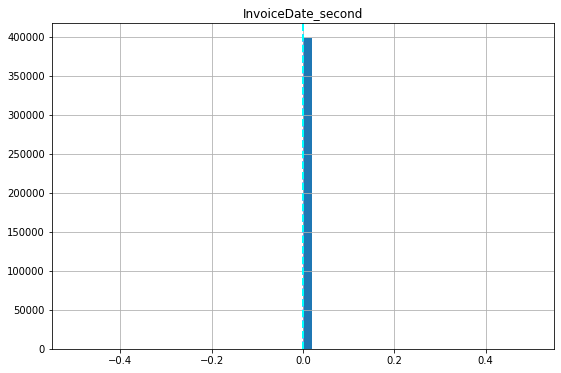

Skewness : 0
Kurtosis : 0


In [305]:
# Analyse all numerical feature using histogram
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (customer_df[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",customer_df[col].skew())
  print( "Kurtosis :",customer_df[col].kurt())

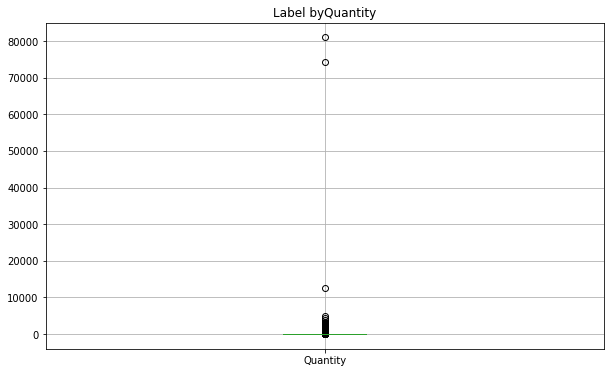

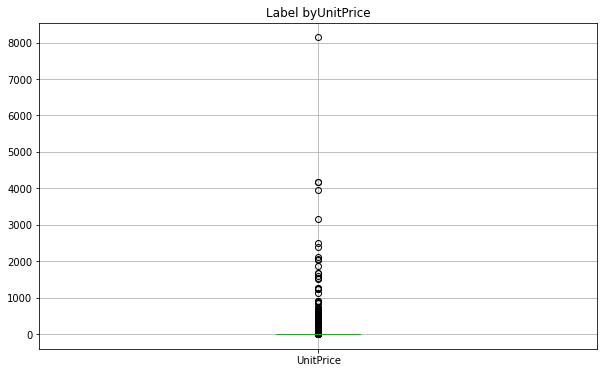

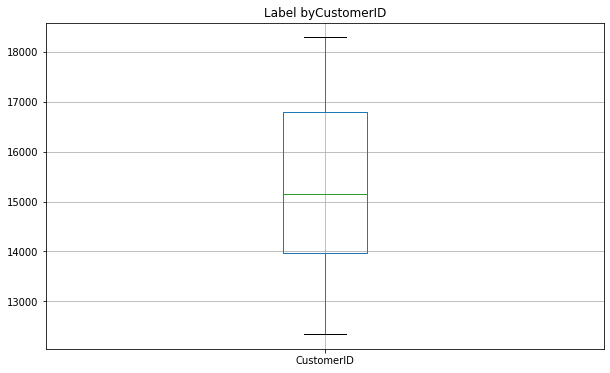

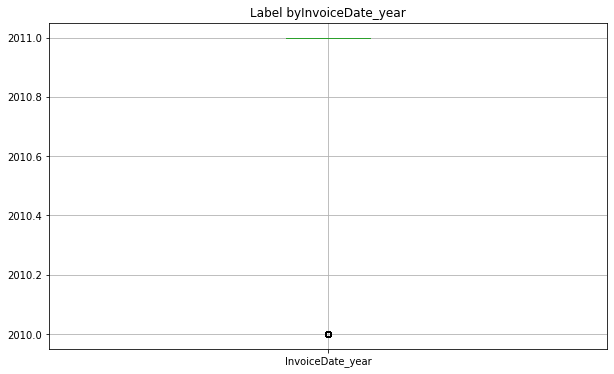

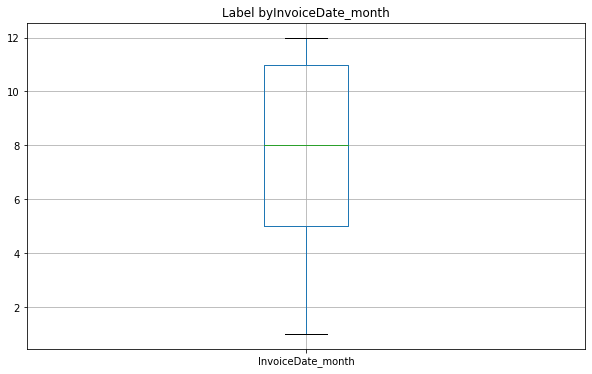

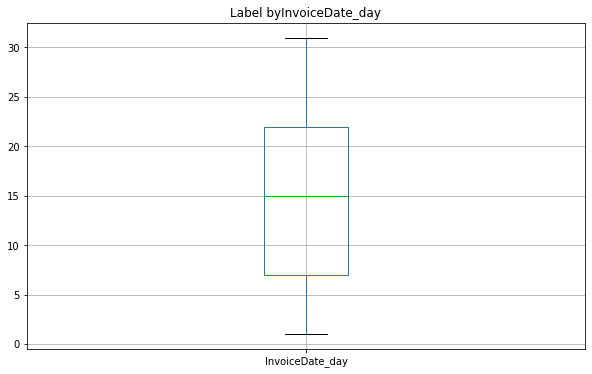

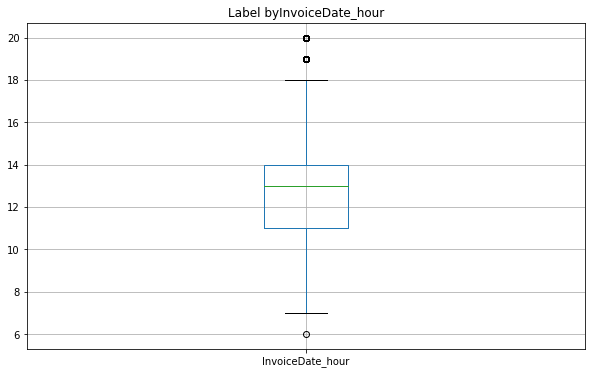

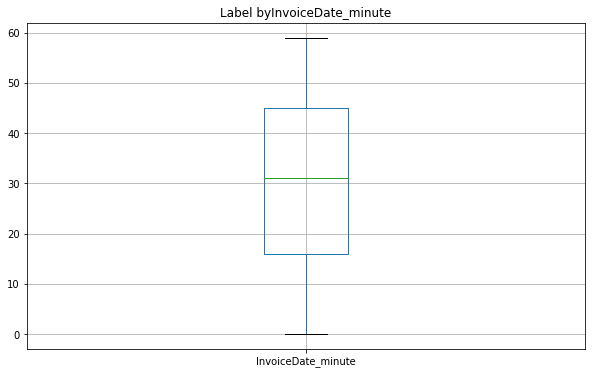

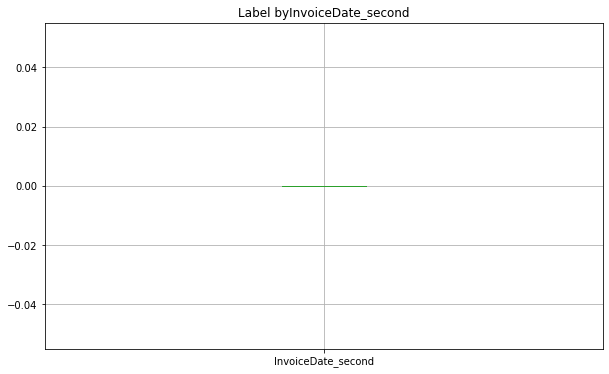

In [306]:
# Plot the box plot for each numerical feature
for col in numerical_features:
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()
  customer_df.boxplot(col)
  ax.set_title("Label by" + col)
plt.show()

# **Correlation Matrix**

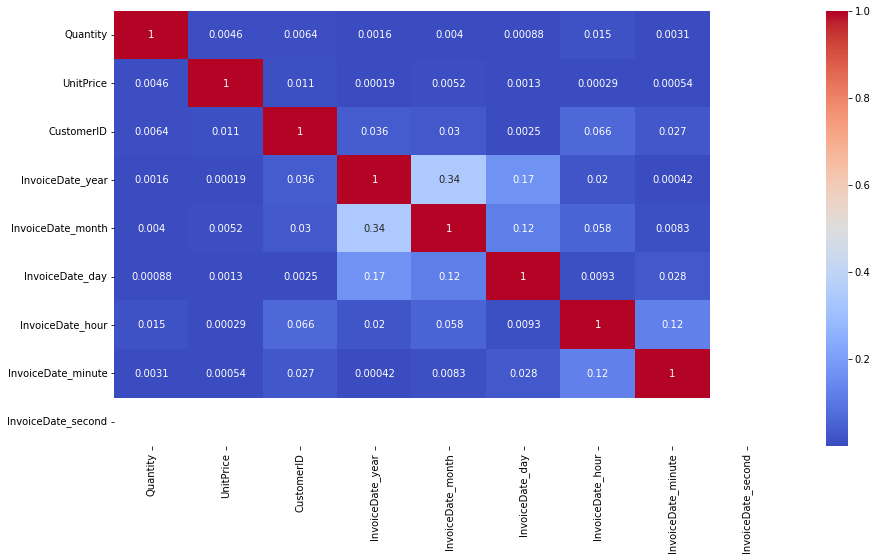

In [307]:
# Plot heatmap to show correlation of different variables
plt.figure(figsize=(15,8))
correlation = customer_df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = "coolwarm")

# **Feature Engineering**

In [308]:
# Create a new feature TotalAmount from product of quamtity and unitprice
customer_df['TotalAmount']= customer_df['Quantity']*customer_df['UnitPrice']

In [309]:
# View the dataset
customer_df.head()

InvoiceNo StockCode  ... InvoiceDate_second  TotalAmount
0    536365    85123A  ...                  0        15.30
1    536365     71053  ...                  0        20.34
2    536365    84406B  ...                  0        22.00
3    536365    84029G  ...                  0        20.34
4    536365    84029E  ...                  0        20.34

[5 rows x 15 columns]

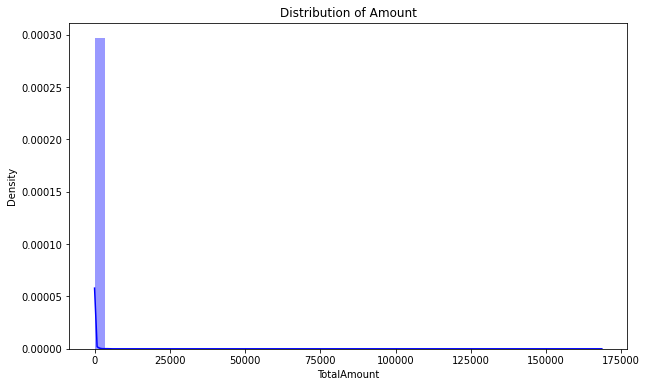

In [310]:
# Plot distribution of amount
plt.figure(figsize=(10,6))
plt.title('Distribution of Amount')
sns.distplot(customer_df['TotalAmount'],color="B")

In [311]:
# Check the description of TotalAmount
customer_df['TotalAmount'].describe()

count    397924.000000
mean         22.394749
std         309.055588
min           0.000000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

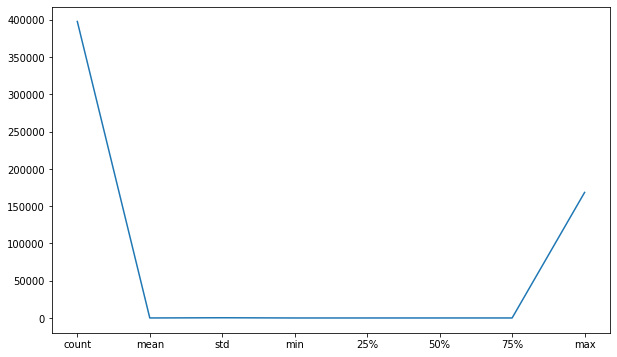

In [312]:
# Plot the description of TotalAmount
plt.figure(figsize=(10,6))
customer_df['TotalAmount'].describe().plot()

In [313]:
# Create a new feature day from Invoicedate
customer_df['Day'] = customer_df['InvoiceDate'].dt.day_name()

In [314]:
# Create a variable and count the day name
day_df = customer_df['Day'].value_counts().reset_index()
day_df.rename(columns = {'index':'Day_Name'}, inplace= True)
day_df.rename(columns = {'Day':'Count'},inplace = True)
day_df

Day_Name  Count
0   Thursday  80052
1  Wednesday  68888
2    Tuesday  66476
3     Monday  64899
4     Sunday  62775
5     Friday  54834

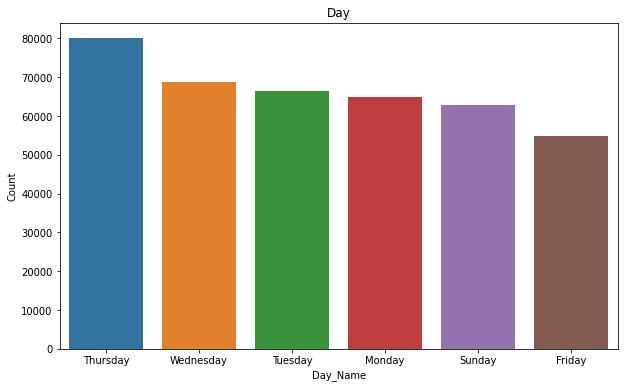

In [315]:
# Plot the number of shopping as per days
plt.figure(figsize=(10,6))
plt.title('Day')
sns.barplot(x= 'Day_Name', y='Count',data=day_df)

Insight: From above plot we can conclude that most number of shopping is done on Thrusday, Wednesday and Tuesday.

In [316]:
# Number of customers shoppping per month
month_df = customer_df['InvoiceDate_month'].value_counts().reset_index()
month_df.rename(columns = {'index':'Month_Name'},inplace = True)
month_df.rename(columns = {'InvoiceDate_month':'Count'},inplace = True)
month_df

Month_Name  Count
0           11  64545
1           10  49557
2           12  43464
3            9  40030
4            5  28322
5            6  27185
6            3  27177
7            8  27013
8            7  26827
9            4  22644
10           1  21232
11           2  19928

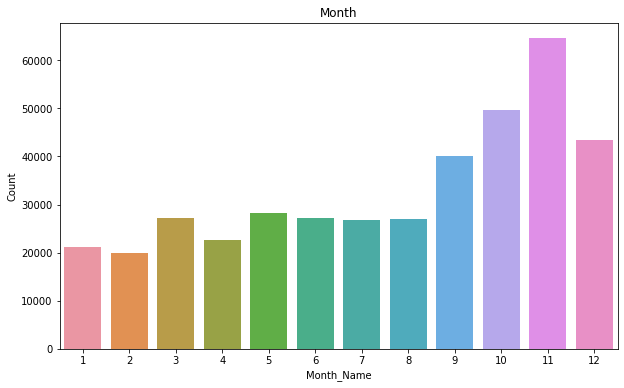

In [317]:
# Plot the result
plt.figure(figsize=(10,6))
plt.title('Month')
sns.barplot(x='Month_Name', y='Count', data=month_df)

Insight: Most number of purchasing is done in the month of november.

In [318]:
# Analyze the number of items purchased throughout the day
hour_df=customer_df['InvoiceDate_hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'InvoiceDate_hour': 'Count'}, inplace=True)
hour_df

Hour_Name  Count
0          12  72069
1          13  64031
2          14  54127
3          11  49092
4          15  45372
5          10  37999
6          16  24093
7           9  21945
8          17  13072
9           8   8691
10         19   3322
11         18   2929
12         20    802
13          7    379
14          6      1

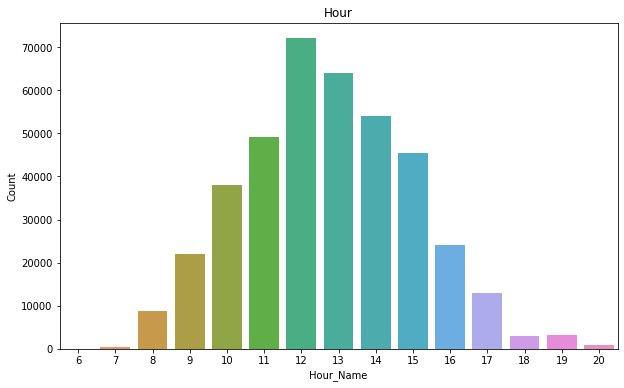

In [319]:
# Plot the result
plt.figure(figsize=(10,6))
plt.title('Hour')
sns.barplot(x='Hour_Name', y='Count', data=hour_df)

Insight: Most of the purchasing was done after 12pm.

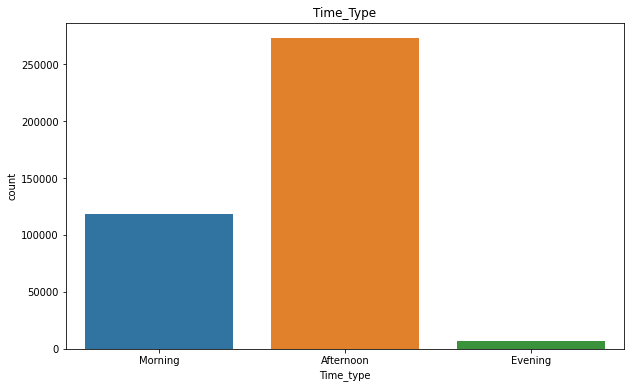

In [320]:
# Lets distribute the day in Morining Afternoon and Evening
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'
customer_df['Time_type']=customer_df['InvoiceDate_hour'].apply(time_type)
# Plot the graph
plt.figure(figsize=(10,6))
plt.title('Time_Type')
sns.countplot(x='Time_type', data = customer_df)

Insight: From above plot we can conclude that most number of purchasing is done in afternoon and least number of purchasing is done in evening.

# **Creating Recency, Frequency and Monetary(RFM) Model**

Before applying any clustering algorithms it is always necessary to determine various quantitative factors on which the algorithm will perform segmentation. Examples of these would be features such as amount spend, activeness of the customer, their last visit, etc.

*   RFM model which stands for Recency, Frequency, and Monetary is one of such steps in which we determine the recency - days to last visit, frequency - how actively the customer repurchases and monetary - total expenditure of the customer, for each customer. There are other steps too in which we divide each of these features accordingly and calculate a score for each customer. However, this approach doesnot require machine learning algorithms as segmentation can be done manually. Therefore we will skip the second step and directly use the rfm features and feed it to clustering algorithms.

*   Recency = Latest Date - Last Inovice Data
*   Frequency = count of invoice no. of transaction(s)
*   Monetary = Sum of Total Amount for each customer

In [321]:
# Set Latest date 2011-12-10 as last invoice date was 2011-12-09
#This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

In [322]:
# Create RFM modelling for each customer
rfm_df = customer_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 
                                                'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()


CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [323]:
# Descriptive Staistics
rfm_df.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

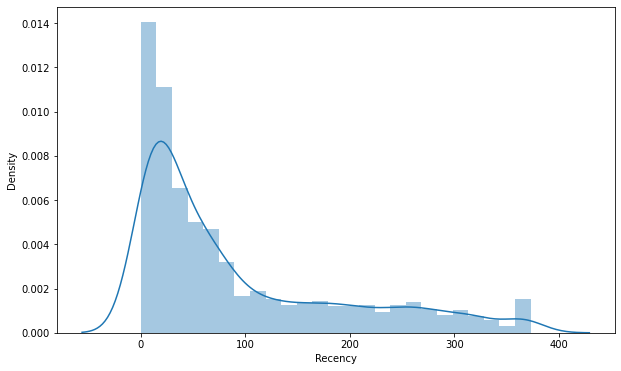

In [324]:
# Recency Distribution Plot
x = rfm_df['Recency']
plt.figure(figsize=(10,6))
sns.distplot(x)

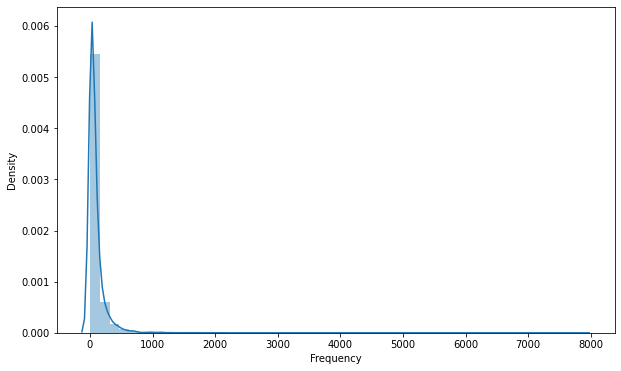

In [325]:
# Desriptive Statistics (Frequency)
x = rfm_df['Frequency']
plt.figure(figsize=(10,6))
sns.distplot(x)

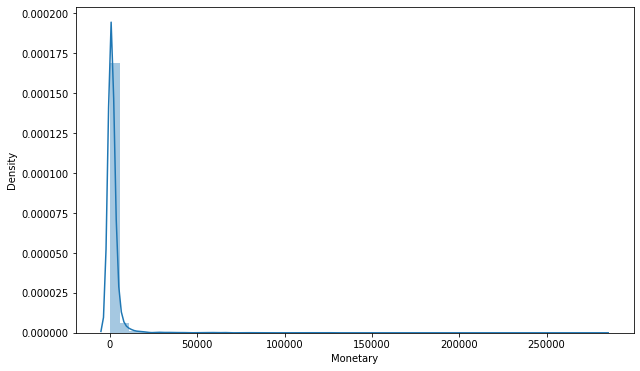

In [326]:
# Descriptive Staistics (Monetray)
x = rfm_df['Monetary']
plt.figure(figsize=(10,6))
sns.distplot(x)

**Split into four segments using Quantiles**

In [327]:
# Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles                           

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5}}

In [328]:
# Functions to create R,F and M segments
def RScoring(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4
def FnMScoring(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1


In [329]:
# Calculate and addd R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [330]:
# Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

In [331]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11

# **Log Transformation**

In [332]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

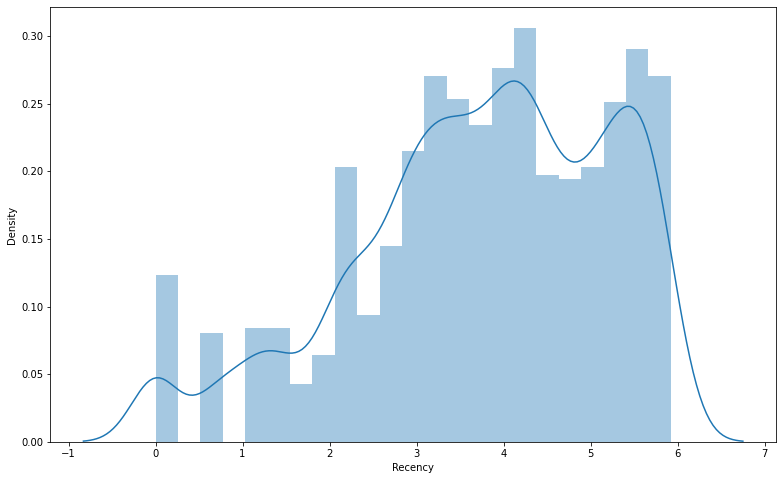

In [333]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

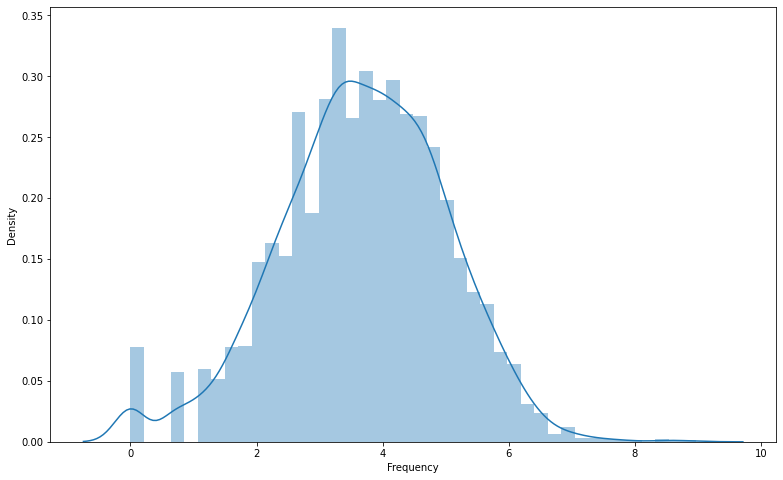

In [334]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

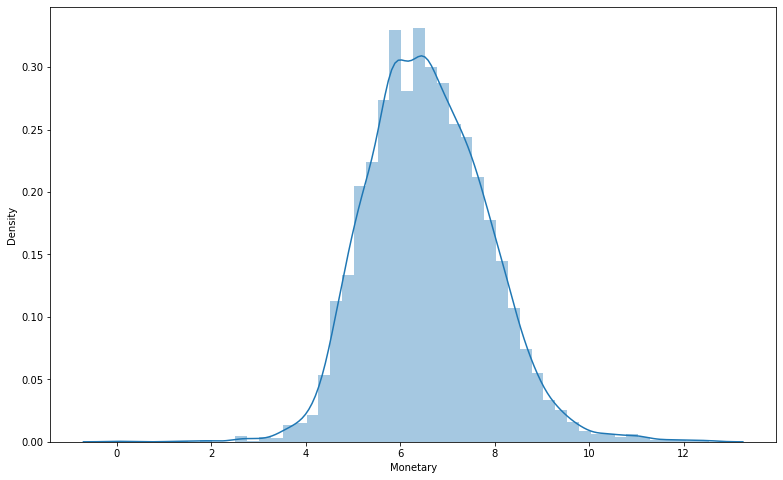

In [336]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

# **K-Means Clsutering Implementation**

*   It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different.




**Calculation of Silhouette Score**

*  Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.




In [340]:
# Creating variable
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [344]:
# Applying Silhouette score method on Recency and Monetary
features_rec_mon = ['Recency_log','Monetary_log']
X_features_rec_mon = rfm_df[features_rec_mon].values
# Fit the model
scaler_rec_mon = preprocessing.StandardScaler()
X_rec_mon = scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters)
  preds = clusterer.fit_predict(X)
  centers = clusterer.cluster_centers_
# Check the silhouette score on clusters
  score = silhouette_score(X,preds)
  print(' For n_clusters = {}, silhouette sore is{}'.format (n_clusters, score))

 For n_clusters = 2, silhouette sore is0.42116701746815816
 For n_clusters = 3, silhouette sore is0.3430765116515706
 For n_clusters = 4, silhouette sore is0.36440677719769515
 For n_clusters = 5, silhouette sore is0.33630226523993184
 For n_clusters = 6, silhouette sore is0.34397322963791443
 For n_clusters = 7, silhouette sore is0.3475686621907122
 For n_clusters = 8, silhouette sore is0.3360493911337664
 For n_clusters = 9, silhouette sore is0.3456370891014486
 For n_clusters = 10, silhouette sore is0.3473583173187593
 For n_clusters = 11, silhouette sore is0.3380313713582309
 For n_clusters = 12, silhouette sore is0.3452162160435036
 For n_clusters = 13, silhouette sore is0.3396894521788433
 For n_clusters = 14, silhouette sore is0.34161093569759604
 For n_clusters = 15, silhouette sore is0.344335561961529


## **Elbow Method Implementation**


*   Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the **hyperparameter** tuning to chose the best value of k. Let us see how this elbow method works. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.
*   When the value of k is 1, the within-cluster sum of the square will be high. As the value of k increases, the within-cluster sum of square value will decrease.
*   Finally, we will plot a graph between k-values and the within-cluster sum of the square to get the k value. we will examine the graph carefully. At some point, our graph will decrease abruptly. That point will be considered as a value of k.

In [345]:
# Applying Elbow Method on Recency and Monetary
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

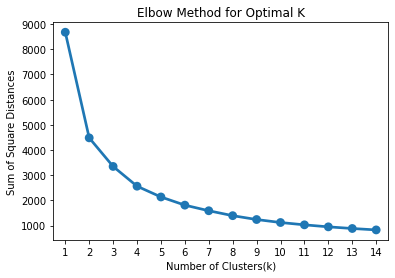

In [347]:
# Plot the graph for the sum of square distance values and number of clusters
sns.pointplot(x=list(sum_of_sq_dist.keys()), y= list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

# **Hyperparameter Tuning For Best Value of K**

In [353]:
# Taking number of cluster as 2
kmeans =  KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

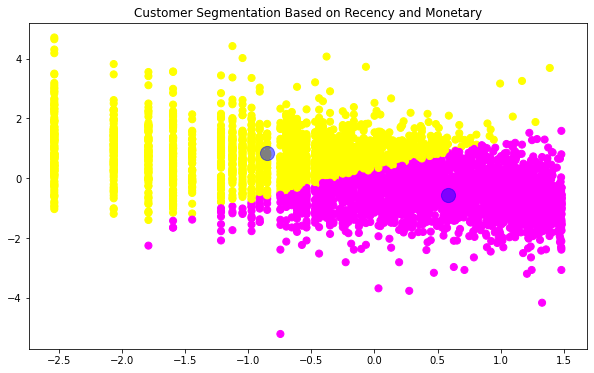

In [354]:
# Plot customer segmentation by taking k=2
plt.figure(figsize=(10,6))
plt.title('Customer Segmentation Based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

Conclusion: We see that customers are well separated when we cluster them on the basis of Recency and Monetary

#  Implementation of Density Based Spatial Clustering of Applications with Noise (DBSCAN)

*   Distance between nearest points.

# **DBSCAN on Recency and Monetary**

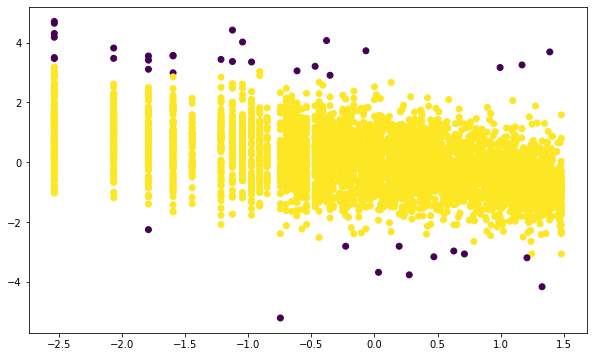

In [357]:
# Applying DBSCAN on Recency and Monetary
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_pred)

**Conclusion:** From above plot we can conclude that customers are well separated by Recency and Monetary.

In [358]:
# Applying silhouette score method on Frequency and Monetary
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4782608772260966
For n_clusters = 3, silhouette score is 0.4073852130516456
For n_clusters = 4, silhouette score is 0.37150257946767606
For n_clusters = 5, silhouette score is 0.34499375250633174
For n_clusters = 6, silhouette score is 0.3604669307631047
For n_clusters = 7, silhouette score is 0.34352658011690707
For n_clusters = 8, silhouette score is 0.3519618581807733
For n_clusters = 9, silhouette score is 0.3454260821561014
For n_clusters = 10, silhouette score is 0.3597613070517442
For n_clusters = 11, silhouette score is 0.3681351171302332
For n_clusters = 12, silhouette score is 0.35213711745773446
For n_clusters = 13, silhouette score is 0.3496441366892742
For n_clusters = 14, silhouette score is 0.347457690553321
For n_clusters = 15, silhouette score is 0.3545232901138788


In [360]:
# Applying elbow method on Frequency and Monetary
sum_of_sq_dist = {}
for k in range (1,15):
  km = KMeans(n_clusters= k, init = 'k-means++', max_iter= 1000)
  km = km.fit(X)
  sum_of_sq_dist[k] = km.inertia_

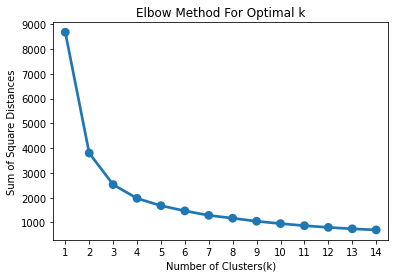

In [361]:
# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Hyperparameter Tuning For Best Value of K

In [362]:
# Taking the number of clusters as 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

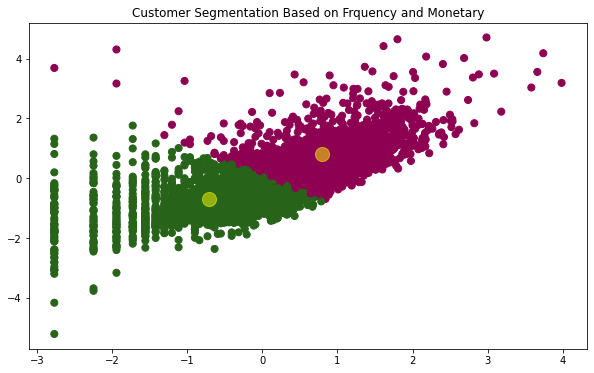

In [364]:
# Plot customer segmentation based on Fequency and Monetary
plt.figure(figsize=(10,6))
plt.title('Customer Segmentation Based on Frquency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

Conclusion: Customers are well separated when we cluster them on basis of Frequency and Monetary.

# **DBSCAN on Frequency and Monetary**

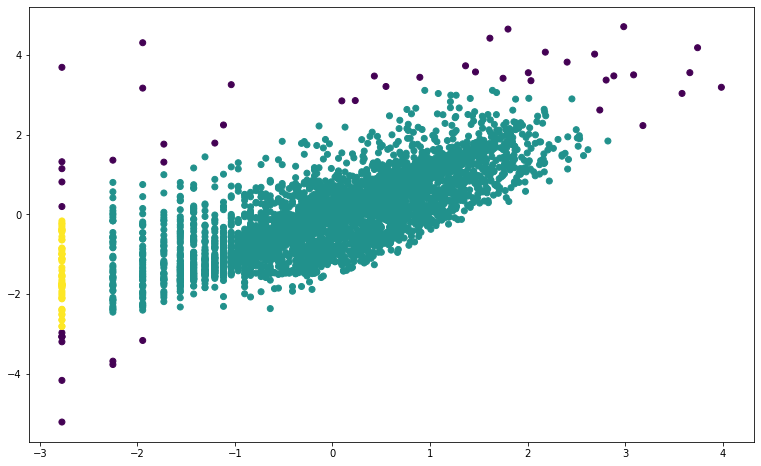

In [365]:
# Applying DBSCAN method on Frequency and Monetary
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

Conclusion: Customer are well segmented on basis of frequency and monetary

# **Comparison between  R vs M and F vs M**

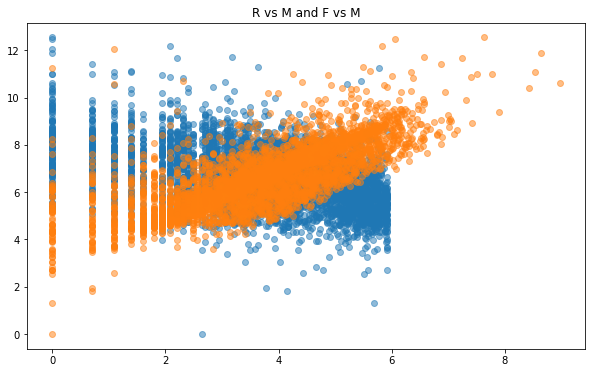

In [369]:
# Plot R vs M and F vs M
plt.figure(figsize=(10,6))
plt.title('R vs M and F vs M')
plt.scatter(rfm_df.Recency_log,rfm_df.Monetary_log,alpha=0.5)
plt.scatter(rfm_df.Frequency_log,rfm_df.Monetary_log,alpha=0.5)

# **Applying Silhouette Method on Recency, Frequency and Monetary**

In [370]:
# Apply silhouette on RFM
feature_vector = ['Recency_log', 'Frequency_log', 'Monetary_log']
X_features = rfm_df[feature_vector].values
scaler = preprocessing.StandardScaler()
X= scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.3951770707909246
For n_clusters = 3 The average silhouette_score is : 0.3028168386903721
For n_clusters = 4 The average silhouette_score is : 0.3017123663809571
For n_clusters = 5 The average silhouette_score is : 0.2785661461874347
For n_clusters = 6 The average silhouette_score is : 0.27885758546690703
For n_clusters = 7 The average silhouette_score is : 0.26198642962742774
For n_clusters = 8 The average silhouette_score is : 0.26471675852789284
For n_clusters = 9 The average silhouette_score is : 0.2530153778663923
For n_clusters = 10 The average silhouette_score is : 0.2530579934556927
For n_clusters = 11 The average silhouette_score is : 0.25926997752720254
For n_clusters = 12 The average silhouette_score is : 0.26592784520282725
For n_clusters = 13 The average silhouette_score is : 0.2621284616521827
For n_clusters = 14 The average silhouette_score is : 0.2609563057895865
For n_clusters = 15 The average silhouette_score is : 

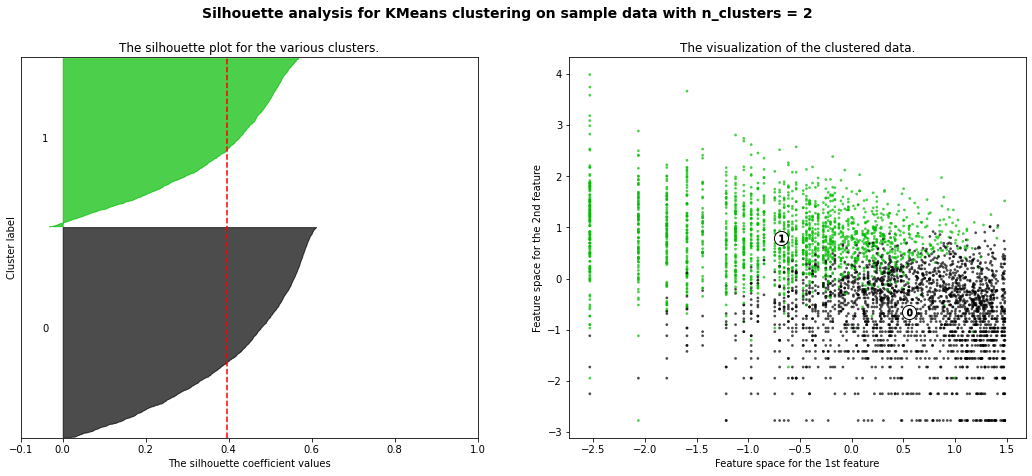

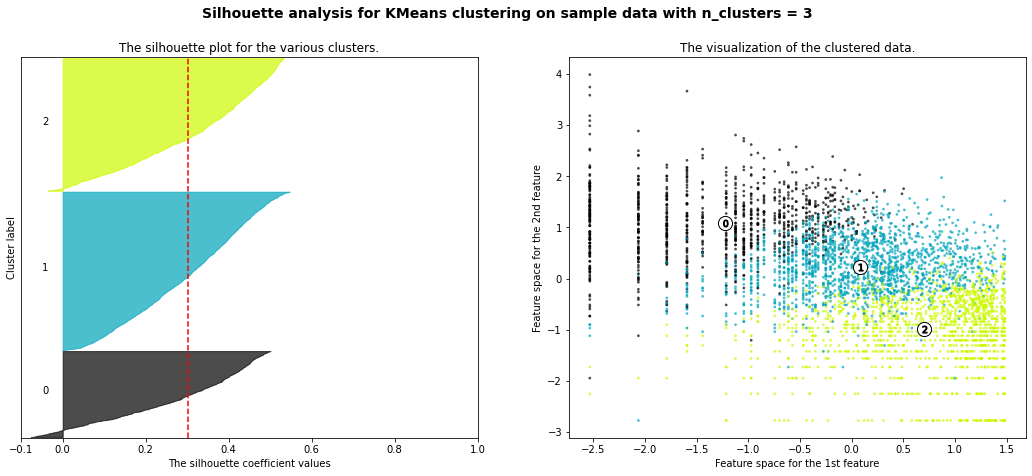

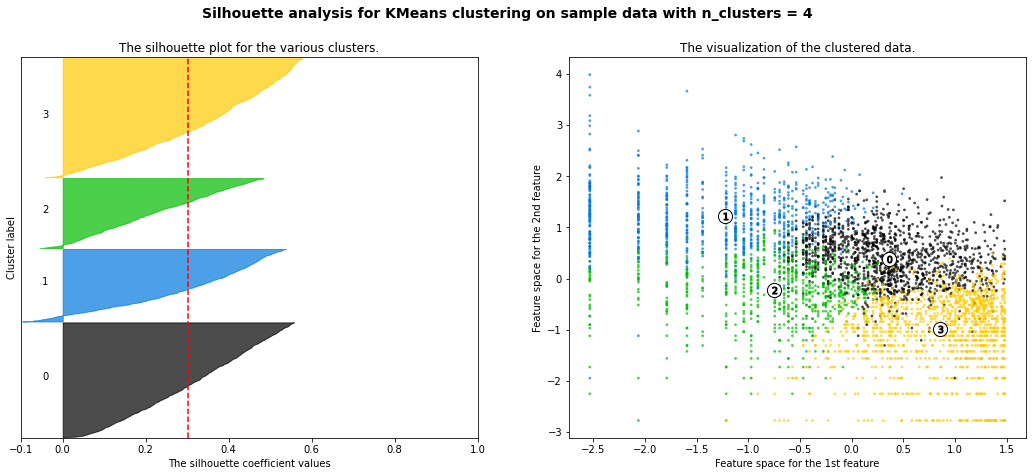

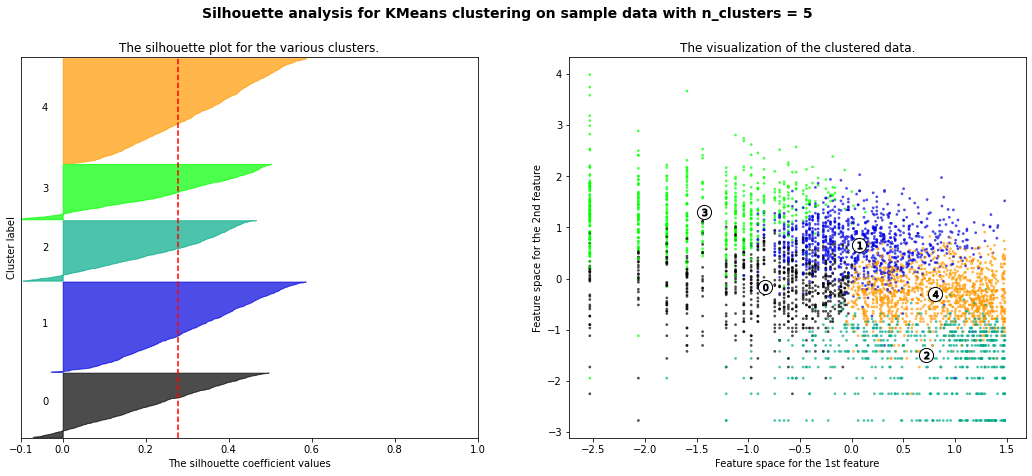

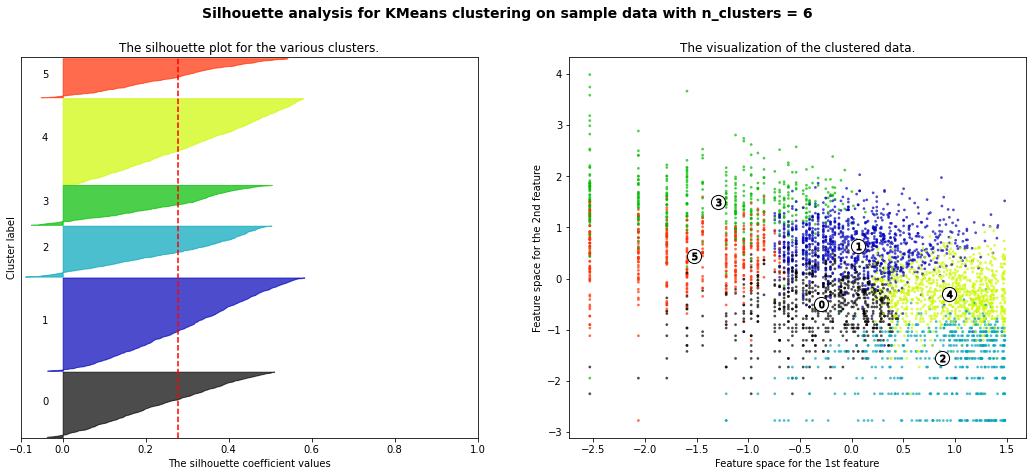

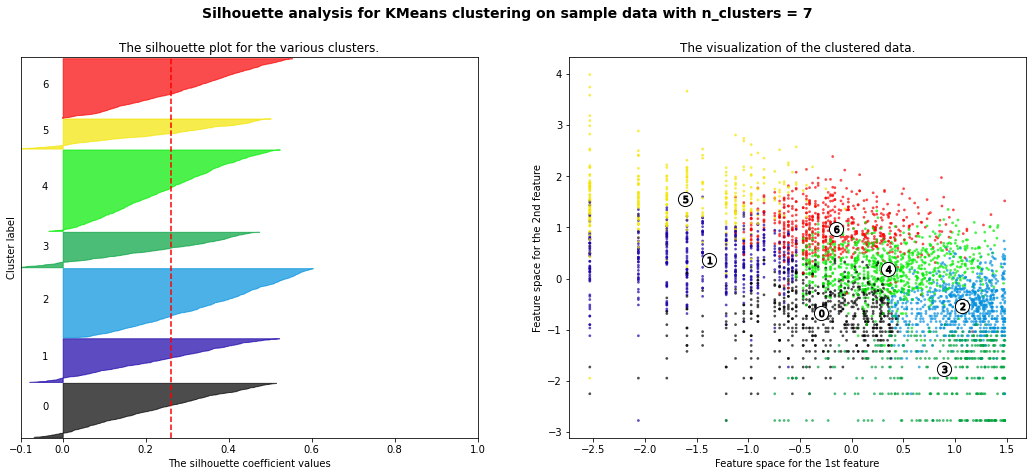

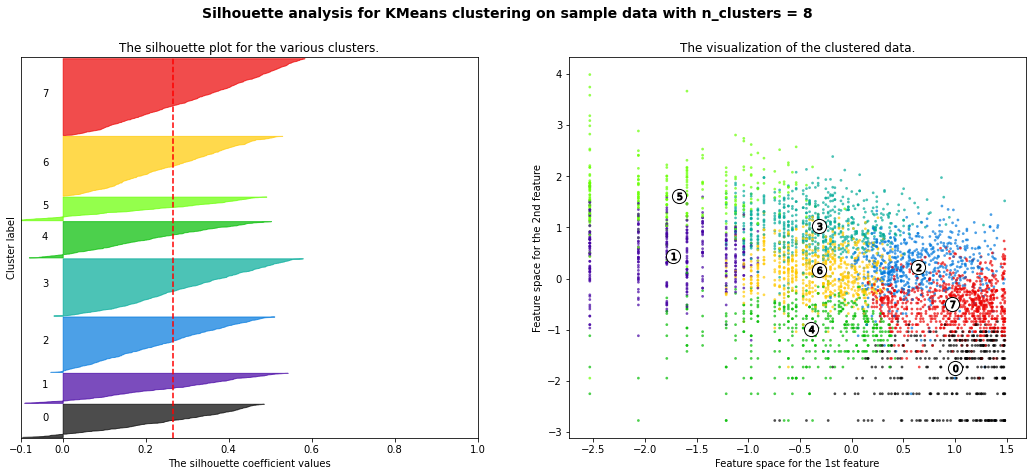

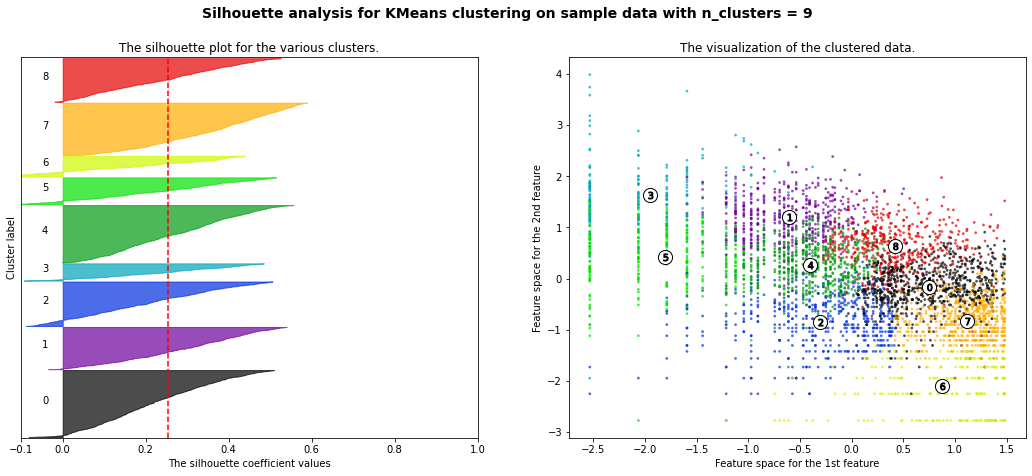

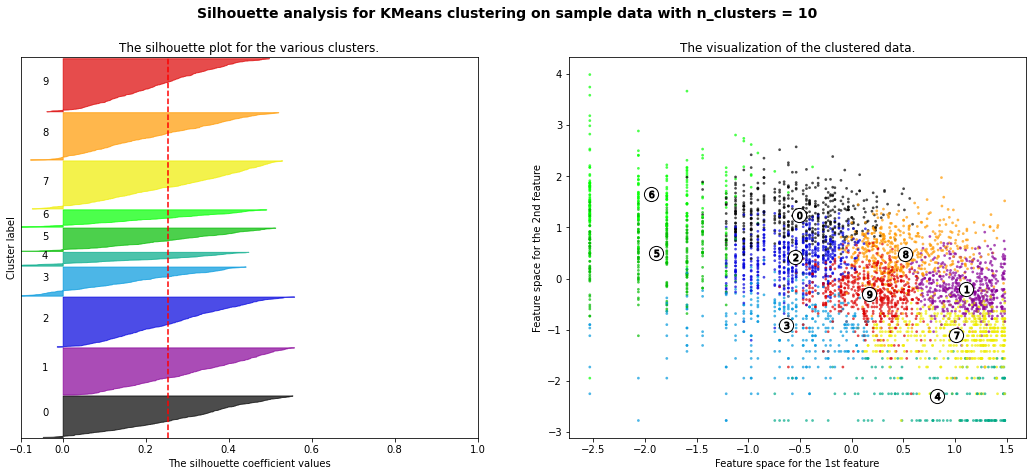

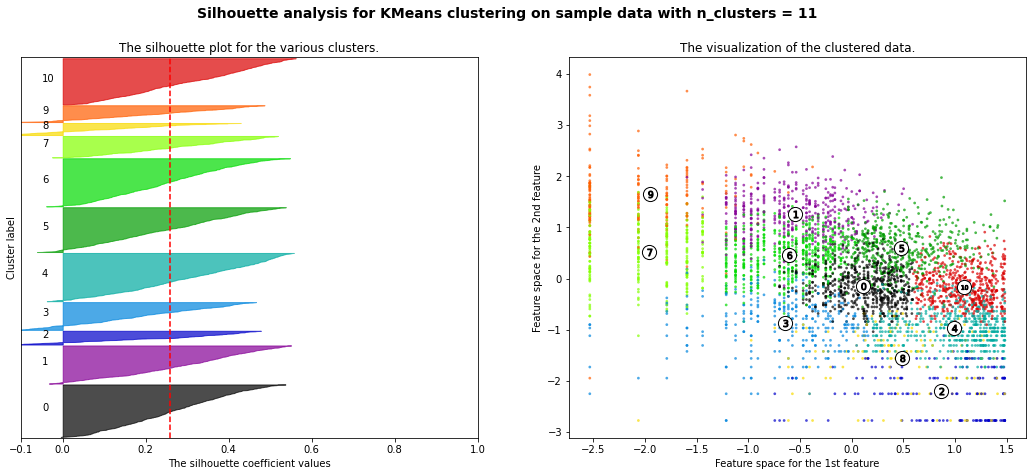

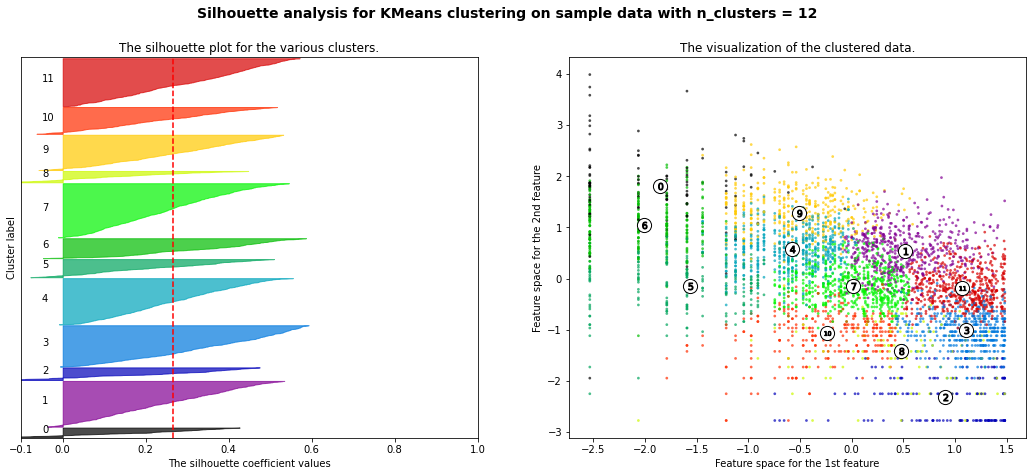

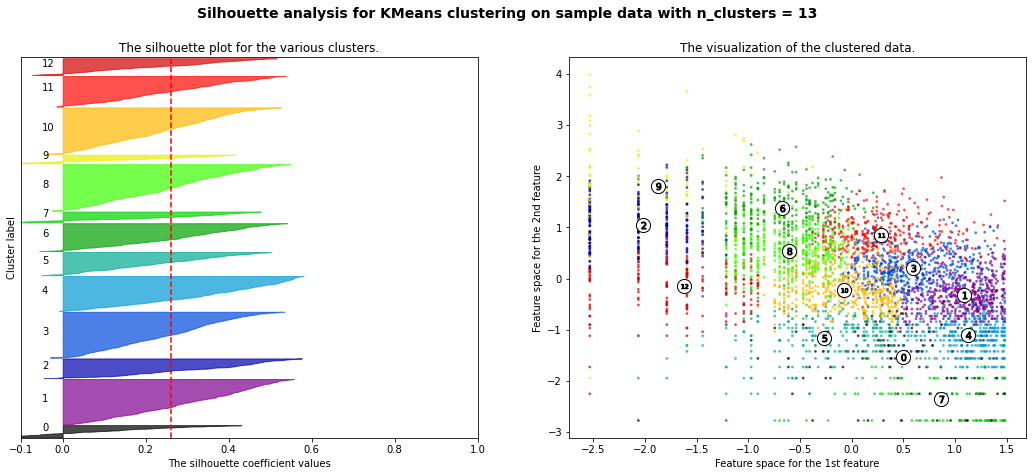

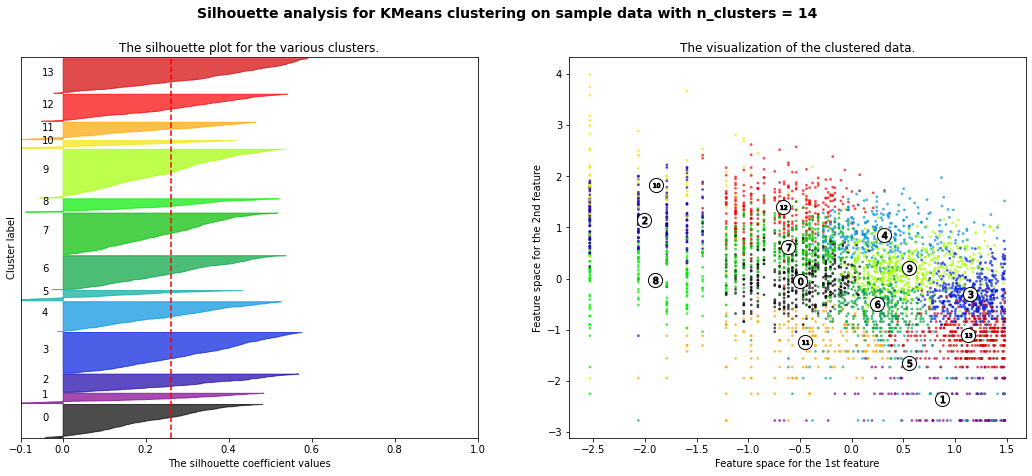

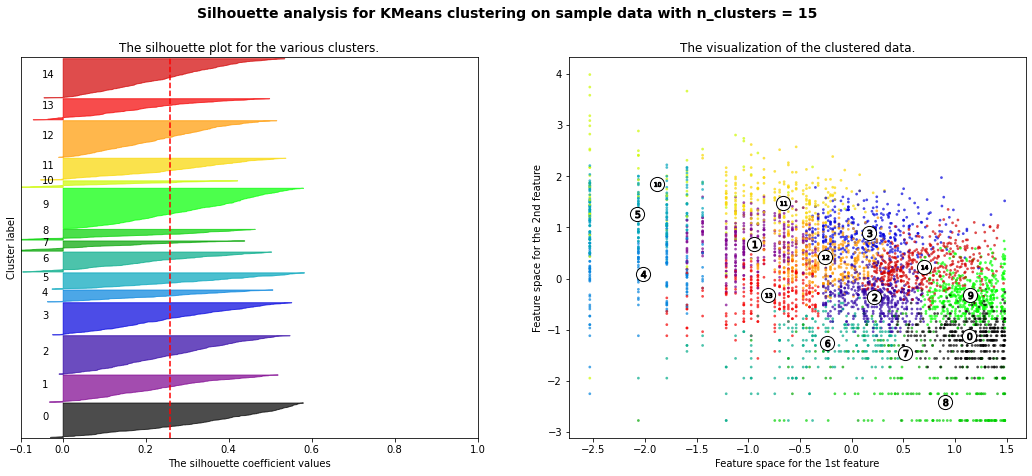

In [375]:
# Plot a silhouette of RFM
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Customer Segmentation on basis of Recency, Monetary and Frequency**

In [376]:
# Customer segmentation by taking k =2
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

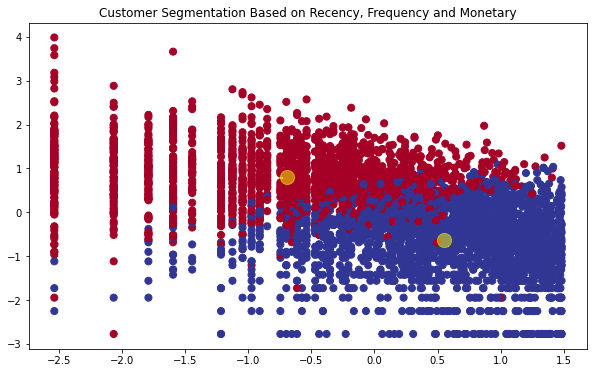

In [381]:
# Plot segmentation
plt.figure(figsize=(10,6))
plt.title('Customer Segmentation Based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c= y_kmeans, s=50, cmap = 'RdYlBu')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'yellow', s=200, alpha=0.5)

In [382]:
# Apply elbow method on Recency, Frequency and Monetary
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

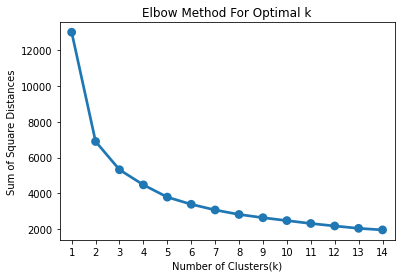

In [383]:
# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [385]:
# Build clustering model
KMean_clust = KMeans(n_clusters = 2, init = 'k-means++', max_iter=1000)
KMean_clust.fit(X)

KMeans(max_iter=1000, n_clusters=2)

In [387]:
# Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(15)

Recency  Frequency  Monetary  ...  Frequency_log  Monetary_log  Cluster
CustomerID                                ...                                      
12346.0         325          1  77183.60  ...       0.000000     11.253942        0
12347.0           2        182   4310.00  ...       5.204007      8.368693        1
12348.0          75         31   1797.24  ...       3.433987      7.494007        0
12349.0          18         73   1757.55  ...       4.290459      7.471676        1
12350.0         310         17    334.40  ...       2.833213      5.812338        0
12352.0          36         85   2506.04  ...       4.442651      7.826459        1
12353.0         204          4     89.00  ...       1.386294      4.488636        0
12354.0         232         58   1079.40  ...       4.060443      6.984161        0
12355.0         214         13    459.40  ...       2.564949      6.129921        0
12356.0          22         59   2811.43  ...       4.077537      7.941449        1
12357.0          33        131   6207.67  ...       4.875197      8.733541        1
12358.0           1         19   1168.06  ...       2.944439      7.063100        1
12359.0          57        248   6372.58  ...       5.513429      8.759760        1
12360.0          52        129   2662.06  ...       4.859812      7.886856        1
12361.0         287         10    189.90  ...       2.302585      5.246498        0

[15 rows x 12 columns]

# **Dendogram**

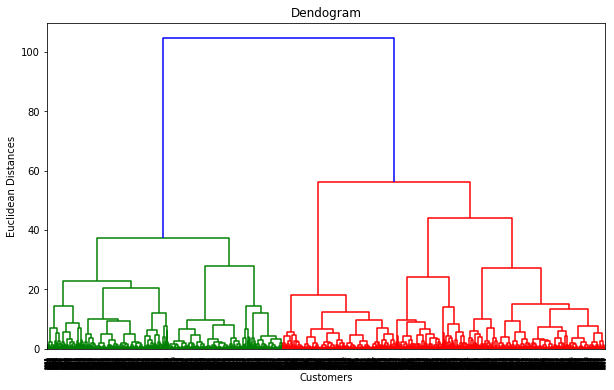

In [393]:
# plot the optimal number of cluster using Dendogram
# Find the largest vertical ditance we can make without crossing any other horizontal line
plt.figure(figsize=(10,6))
dendogram = sch.dendrogram(sch.linkage(X,method= 'ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()



*   The number of clusters will be the number of vertical lines which are being intersected by the liine drawn using the threshold = 90
*   Number of cluster is 2



In [397]:
# Fitting the hierarchial clustering to the dataset
h_cluster = AgglomerativeClustering(n_clusters= 2, affinity= 'euclidean', linkage = 'ward')
y_h_cluster = h_cluster.fit_predict(X)

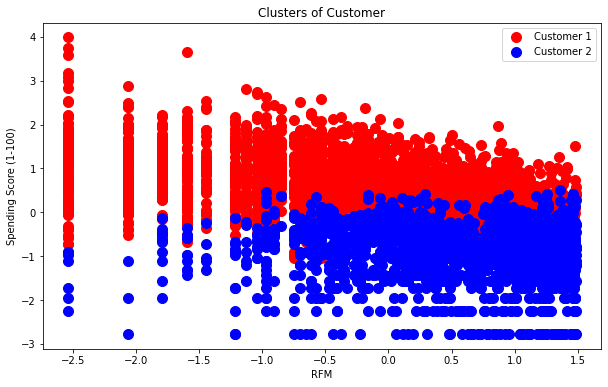

In [402]:
# Visualizing clusters (2D only)
plt.figure(figsize=(10,6))
plt.scatter(X[y_h_cluster == 0, 0], X[y_h_cluster == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_h_cluster == 1, 0], X[y_h_cluster == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Conclusion: By applying different algorithm to our dataset,the optimal number of cluster is 2.

# **Implementing DBSCAN to Recency, Frequency and Monetary**

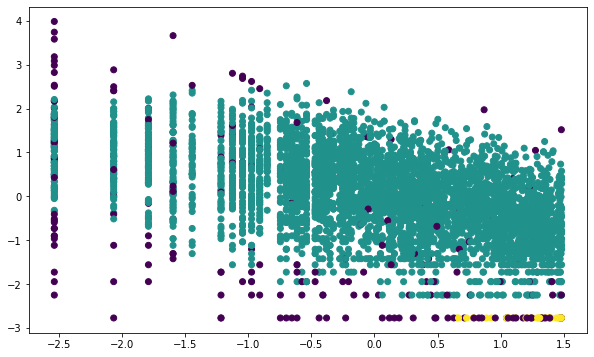

In [406]:
# Applying DBSCAN on RFM
y_pred = DBSCAN(eps = 0.5, min_samples = 15).fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:,1], c=y_pred)

Conclusion: We can conclude by above plot that customers are well segmented by Recency, Frequency and Monetary. Also, the number of clusters is equal to 3.

# **Summary**

In [409]:
# Create a table and specify the column while initializing the table
summary_table = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"])
# Add Rows
summary_table.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
summary_table.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
summary_table.add_row(['3',"DBSCAN ", "RM", "2"]) 
summary_table.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
summary_table.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
summary_table.add_row(['6',"DBSCAN ", "FM", "2"])
summary_table.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
summary_table.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
summary_table.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])
summary_table.add_row(['10',"DBSCAN ", "RFM", "3"])
print(summary_table)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |   Hierarchical clustering      | RFM  |             2             |
|   10   |            DBSCAN              | RFM  |  

# **Overall Conclusion**

Throughout the analysis we went through various steps to perform customer segmentation. We started with data wrangling in which we tried to handle null values, duplicates and performed feature modifications. Next, we did some exploratory data analysis and tried to draw observations from the features we had in the dataset.

Next, we formulated some quantitative factors such as recency, frequency and monetary known as rfm model for each of the customers. We implemented KMeans clustering algorithm on these features. We also performed silhouette and elbow method analysis to determine the optimal no. of clusters which was 2. We saw customers having high recency and low frequency and monetary values were part of one cluster and customers having low recency and high frequency, monetary values were part of another cluster.

However, there can be more modifications on this analysis. One may choose to cluster into more no. depending on company objectives and preferences. The labelled feature after clustering can be fed into classification supervised machine learning algorithms that could predict the classes for new set of observations. The clustering can also be performed on new set of features such as type of products each customer prefer to buy often, finding out customer lifetime value (clv), segmenting on the basis of time period they visit and much more.